In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay

In [3]:
data=pd.read_csv("Air_line_passanger.csv")

In [4]:
data

,Unnamed: 0,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,dissatisfied
1,2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
2,4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
3,5,Female,Loyal Customer,26,Personal Travel,Eco,1180,3,4,2,...,1,3,4,4,4,4,1,0,0.0,dissatisfied
4,6,Male,Loyal Customer,47,Personal Travel,Eco,1276,2,4,2,...,2,3,3,4,3,5,2,9,23.0,dissatisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86954,103899,Female,disloyal Customer,23,Business travel,Eco,192,2,1,2,...,2,3,1,4,2,3,2,3,0.0,dissatisfied
86955,103900,Male,Loyal Customer,49,Business travel,Business,2347,4,4,4,...,5,5,5,5,5,5,4,0,0.0,satisfied
86956,103901,Male,disloyal Customer,30,Business travel,Business,1995,1,1,1,...,4,3,2,4,5,5,4,7,14.0,dissatisfied
86957,103902,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,1,...,1,4,5,1,5,4,1,0,0.0,dissatisfied


In [5]:
data.columns

Index(['Unnamed: 0', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Online booking', 'Gate location',
       'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

In [6]:
data.drop('Unnamed: 0',axis =1,inplace=True)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86959 entries, 0 to 86958
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Gender                             86959 non-null  object 
 1   Customer Type                      86959 non-null  object 
 2   Age                                86959 non-null  int64  
 3   Type of Travel                     86959 non-null  object 
 4   Class                              86959 non-null  object 
 5   Flight Distance                    86959 non-null  int64  
 6   Inflight wifi service              86959 non-null  int64  
 7   Departure/Arrival time convenient  86959 non-null  int64  
 8   Online booking                     86959 non-null  int64  
 9   Gate location                      86959 non-null  int64  
 10  Food and drink                     86959 non-null  int64  
 11  Online boarding                    86959 non-null  int

## Data Preprocessing

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
# identifying x (input_column) and y (traget_column)
x = data.drop('satisfaction',axis =1)
y = data['satisfaction']

In [10]:
y.value_counts()

dissatisfied    46620
satisfied       40339
Name: satisfaction, dtype: int64

In [11]:
y= y.map({"satisfied":1,"dissatisfied":0})

## Spliting data train and test

In [12]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20)

In [13]:
print("X_train_shape =",x_train.shape)
print("X_test_shape = ",x_test.shape)
print("y_train_shape = ",y_train.shape)
print("y_test_shape = ",y_test.shape)

X_train_shape = (69567, 22)
X_test_shape =  (17392, 22)
y_train_shape =  (69567,)
y_test_shape =  (17392,)


## Data preprocessing on train data


### rescaling numerical data

In [14]:
x_train_cat = x_train.select_dtypes(include="object")

In [15]:
x_train_num = x_train[ ['Age','Flight Distance',
                     'Departure Delay in Minutes','Arrival Delay in Minutes'] ]

In [16]:

x_train_l = x_train[['Inflight wifi service','Departure/Arrival time convenient', 'Online booking', 'Gate location',
                        'Food and drink', 'Online boarding', 'Seat comfort','Inflight entertainment', 
                        'On-board service', 'Leg room service','Baggage handling', 'Checkin service', 'Inflight service',
                        'Cleanliness']]

In [17]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
x_train_num_rescale=pd.DataFrame(std.fit_transform(x_train_num),
                                columns = x_train_num.columns,index = x_train_num.index)
x_train_num_rescale.head()

,Age,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes
52791,1.559005,-0.996134,1.363732,2.438970
15189,-1.498792,-0.395005,-0.505266,-0.521449
48465,0.030106,0.964764,0.821120,0.958761
5351,2.423165,-0.909404,2.388667,2.562321
52103,-1.432319,0.598903,-0.505266,-0.521449


###  applying OneHotEncoder

In [18]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(drop = "first",sparse_output=False)
x_train_cat_ohe = pd.DataFrame(ohe.fit_transform(x_train_cat),
                          columns = ohe.get_feature_names_out(x_train_cat.columns),
                          index = x_train_cat.index)
x_train_cat_ohe.head()

,Gender_Male,Customer Type_disloyal Customer,Type of Travel_Personal Travel,Class_Eco,Class_Eco Plus
52791,1.0,0.0,0.0,1.0,0.0
15189,1.0,1.0,0.0,1.0,0.0
48465,0.0,0.0,1.0,1.0,0.0
5351,0.0,0.0,0.0,1.0,0.0
52103,1.0,0.0,0.0,0.0,0.0


### applying label_encoding

In [19]:
x_train_label = pd.DataFrame(index=x_train_l.index)
x_train_label.head()

""
52791
15189
48465
5351
52103


In [20]:
def label_encoding(i,j):
    label_encoder = i
    x_train_label[j] = x_train_l[j].apply(lambda x : label_encoder[x])
    return x_train_label.head()

In [21]:
# label_encoding of Inflight wifi service column
label_encoding({0 : 1, 1 : 2, 2 : 3, 3 : 4, 4 : 5,5:6},'Inflight wifi service')
# label_encoding of Departure/Arrival time convenient column
label_encoding({0 : 1, 1 : 2, 2 : 3, 3 : 4, 4 : 5,5:6},'Departure/Arrival time convenient')
# label_encoding of Online booking column
label_encoding({0 : 1, 1 : 2, 2 : 3, 3 : 4, 4 : 5,5:6},'Online booking')
# label_encoding of Gate location column
label_encoding({0 : 1, 1 : 2, 2 : 3, 3 : 4, 4 : 5,5:6},'Gate location')
# label_encoding of Food and drink column
label_encoding({0 : 1, 1 : 2, 2 : 3, 3 : 4, 4 : 5,5:6},'Food and drink')
# label_encoding of Online boarding column
label_encoding({0 : 1, 1 : 2, 2 : 3, 3 : 4, 4 : 5,5:6},'Online boarding')
# label_encoding of Seat comfort column
label_encoding({1: 1, 2 : 2, 3 : 3, 4 : 4, 5 : 5},'Seat comfort')
# label_encoding of Inflight entertainmentcolumn
label_encoding({0 : 1, 1 : 2, 2 : 3, 3 : 4, 4 : 5,5:6},'Inflight entertainment')
# label_encoding of On-board service column
label_encoding({0 : 1, 1 : 2, 2 : 3, 3 : 4, 4 : 5,5:6},'On-board service')
# label_encoding of Leg room service column
label_encoding({0 : 1, 1 : 2, 2 : 3, 3 : 4, 4 : 5,5:6},'Leg room service')
# label_encoding of Baggage handling column
label_encoding({1: 1, 2 : 2, 3 : 3, 4 : 4, 5 : 5},'Baggage handling')
# label_encoding of Checkin service column
label_encoding({ 2 : 1, 3 : 2, 4 : 3, 5 : 4},'Checkin service')
# label_encoding of Inflight service column
label_encoding({0 : 1, 1 : 2, 2 : 3, 3 : 4, 4 : 5,5:6},'Inflight service')
# label_encoding of Cleanliness column
label_encoding({0 : 1, 1 : 2, 2 : 3, 3 : 4, 4 : 5,5:6},'Cleanliness')

,Inflight wifi service,Departure/Arrival time convenient,Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness
52791,3,3,3,3,3,3,2,3,3,3,3,1,3,3
15189,6,6,6,5,3,6,2,3,2,6,2,3,6,3
48465,4,3,4,4,5,4,4,5,3,3,4,1,5,5
5351,3,3,3,3,3,4,3,3,3,3,2,1,3,2
52103,5,5,5,5,5,5,4,5,5,5,5,4,5,5


In [22]:
#Concate the Categorical columns and Numerical columns 
x_train_transform = pd.concat([x_train_num_rescale,x_train_cat_ohe,x_train_label],axis=1)
x_train_transform

,Age,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes,Gender_Male,Customer Type_disloyal Customer,Type of Travel_Personal Travel,Class_Eco,Class_Eco Plus,Inflight wifi service,...,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness
52791,1.559005,-0.996134,1.363732,2.438970,1.0,0.0,0.0,1.0,0.0,3,...,3,3,2,3,3,3,3,1,3,3
15189,-1.498792,-0.395005,-0.505266,-0.521449,1.0,1.0,0.0,1.0,0.0,6,...,3,6,2,3,2,6,2,3,6,3
48465,0.030106,0.964764,0.821120,0.958761,0.0,0.0,1.0,1.0,0.0,4,...,5,4,4,5,3,3,4,1,5,5
5351,2.423165,-0.909404,2.388667,2.562321,0.0,0.0,0.0,1.0,0.0,3,...,3,4,3,3,3,3,2,1,3,2
52103,-1.432319,0.598903,-0.505266,-0.521449,1.0,0.0,0.0,0.0,0.0,5,...,5,5,4,5,5,5,5,4,5,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41153,-1.033475,-0.742922,-0.203814,-0.521449,1.0,1.0,0.0,1.0,0.0,5,...,5,5,4,5,6,2,5,4,4,5
44423,-1.432319,0.053600,-0.505266,-0.521449,1.0,0.0,1.0,1.0,0.0,2,...,4,1,3,4,5,5,3,3,6,4
79246,0.761318,-0.442856,-0.505266,-0.521449,0.0,0.0,1.0,1.0,0.0,3,...,5,3,1,4,4,3,3,4,4,6
70140,1.824900,-1.103799,-0.505266,-0.274747,0.0,0.0,1.0,0.0,0.0,4,...,5,6,4,3,3,4,2,2,3,5


## Data preprocessing on test data

In [23]:
x_test_num = x_test[ ['Age','Flight Distance',
                     'Departure Delay in Minutes','Arrival Delay in Minutes'] ]
x_test_l = x_test[['Inflight wifi service','Departure/Arrival time convenient', 'Online booking', 'Gate location',
                        'Food and drink', 'Online boarding', 'Seat comfort','Inflight entertainment', 
                        'On-board service', 'Leg room service','Baggage handling', 'Checkin service', 'Inflight service',
                        'Cleanliness']]

In [24]:
x_test_cat = x_test.select_dtypes(include="object")

### rescaling numerical data

In [25]:
x_test_num_rescale = pd.DataFrame(std.transform(x_test_num),
                                 columns=x_test_num.columns,
                                 index=x_test_num.index)
x_test_num_rescale.head()

,Age,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes
6195,1.293109,0.897972,-0.505266,-0.521449
50142,-1.099949,0.180206,-0.505266,-0.521449
11738,-1.365845,0.379585,1.544603,1.760541
2344,0.096580,0.941836,-0.505266,-0.521449
43009,0.030106,0.332731,0.097637,-0.521449


### applying one hot encoding 

In [26]:
x_test_cat_ohe = pd.DataFrame(ohe.transform(x_test_cat),
                             columns = ohe.get_feature_names_out(x_test_cat.columns),
                             index = x_test_cat.index)
x_test_cat_ohe.head()

,Gender_Male,Customer Type_disloyal Customer,Type of Travel_Personal Travel,Class_Eco,Class_Eco Plus
6195,1.0,0.0,0.0,0.0,0.0
50142,1.0,1.0,0.0,0.0,0.0
11738,1.0,0.0,1.0,0.0,1.0
2344,0.0,0.0,0.0,0.0,0.0
43009,1.0,0.0,0.0,0.0,0.0


### applying label_encoding

In [27]:
x_test_label = pd.DataFrame(index=x_test_l.index)
x_test_label.head()

""
6195
50142
11738
2344
43009


In [28]:
def label_encoding_test(i,j):
    label_encoder = i
    x_test_label[j] = x_test_l[j].apply(lambda x : label_encoder[x])
    return x_test_label.head()

In [29]:
# label_encoding of Inflight wifi service column
label_encoding_test({0 : 1, 1 : 2, 2 : 3, 3 : 4, 4 : 5,5:6},'Inflight wifi service')
# label_encoding of Departure/Arrival time convenient column
label_encoding_test({0 : 1, 1 : 2, 2 : 3, 3 : 4, 4 : 5,5:6},'Departure/Arrival time convenient')
# label_encoding of Online booking column
label_encoding_test({0 : 1, 1 : 2, 2 : 3, 3 : 4, 4 : 5,5:6},'Online booking')
# label_encoding of Gate location column
label_encoding_test({0 : 1, 1 : 2, 2 : 3, 3 : 4, 4 : 5,5:6},'Gate location')
# label_encoding of Food and drink column
label_encoding_test({0 : 1, 1 : 2, 2 : 3, 3 : 4, 4 : 5,5:6},'Food and drink')
# label_encoding of Online boarding column
label_encoding_test({0 : 1, 1 : 2, 2 : 3, 3 : 4, 4 : 5,5:6},'Online boarding')
# label_encoding of Seat comfort column
label_encoding_test({1: 1, 2 : 2, 3 : 3, 4 : 4, 5 : 5},'Seat comfort')
# label_encoding of Inflight entertainmentcolumn
label_encoding_test({0 : 1, 1 : 2, 2 : 3, 3 : 4, 4 : 5,5:6},'Inflight entertainment')
# label_encoding of On-board service column
label_encoding_test({0 : 1, 1 : 2, 2 : 3, 3 : 4, 4 : 5,5:6},'On-board service')
# label_encoding of Leg room service column
label_encoding_test({0 : 1, 1 : 2, 2 : 3, 3 : 4, 4 : 5,5:6},'Leg room service')
# label_encoding of Baggage handling column
label_encoding_test({1: 1, 2 : 2, 3 : 3, 4 : 4, 5 : 5},'Baggage handling')
# label_encoding of Checkin service column
label_encoding_test({ 2 : 1, 3 : 2, 4 : 3, 5 : 4},'Checkin service')
# label_encoding of Inflight service column
label_encoding_test({0 : 1, 1 : 2, 2 : 3, 3 : 4, 4 : 5,5:6},'Inflight service')
# label_encoding of Cleanliness column
label_encoding_test({0 : 1, 1 : 2, 2 : 3, 3 : 4, 4 : 5,5:6},'Cleanliness')

,Inflight wifi service,Departure/Arrival time convenient,Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness
6195,6,6,6,6,4,5,5,6,6,6,4,3,6,6
50142,5,6,4,4,6,4,5,6,5,3,5,4,6,6
11738,3,6,3,4,4,3,3,4,4,4,3,2,5,4
2344,4,4,4,4,3,5,4,5,5,5,4,4,5,4
43009,5,5,5,5,4,5,5,5,5,5,4,3,5,4


In [30]:
#Concate the Categorical columns and Numerical columns 
x_test_transform = pd.concat([x_test_num_rescale,x_test_cat_ohe,x_test_label],axis=1)

## logical Structure

In [31]:
y.value_counts()

0    46620
1    40339
Name: satisfaction, dtype: int64

In [32]:
from imblearn.over_sampling import SMOTE

In [33]:
s = SMOTE()
x_train_transform,y_train=s.fit_resample(x_train_transform,y_train)

In [34]:
print(x_train_transform.shape)
print(y_train.shape)

(74472, 23)
(74472,)


In [35]:
import keras 
import keras_tuner as k
from keras import Sequential
from keras.layers import Dense,Input,BatchNormalization,Dropout
from keras.initializers import he_uniform,glorot_normal,he_normal,glorot_uniform

Using TensorFlow backend


In [36]:
def modelss(hp):
    model = Sequential()

    model.add(Input(shape=(23,)))
    
    for i in range(hp.Int("hiddenlayers",min_value=5,max_value=10)):
                model.add(Dense(units=hp.Int("neurons{}".format(i),min_value=1,max_value=15),
                                activation=hp.Choice("activation",values=["sigmoid","tanh","relu"]),kernel_initializer=hp.Choice("weight_init",values=["glorot_uniform","glorot_normal","he_uniform","he_normal"])))
                model.add(BatchNormalization())
                model.add(Dropout(rate=hp.Float("dropout", min_value=0.0, max_value=0.5)))
    
    model.add(Dense(1,activation="sigmoid"))
    model.compile(loss="binary_crossentropy",
                  optimizer= hp.Choice("optimizer",["sgd","adam","adadelta"]),metrics=['accuracy'])
    return model

In [37]:
tuner = k.RandomSearch(modelss,objective="val_accuracy",max_trials=3,directory=r'C:\Users\Dell\Documents\Deep_Learning\Deep_Learning_\ANN_coding\Ann_Project\Air_line_project',project_name="f1")

In [38]:
tuner.search(x_train_transform,y_train,epochs=10,validation_data=(x_test_transform,y_test))

Trial 3 Complete [00h 02m 19s]
val_accuracy: 0.6698482036590576

Best val_accuracy So Far: 0.8841996192932129
Total elapsed time: 00h 06m 24s


In [39]:
tuner.search_space_summary()

Search space summary
Default search space size: 13
hiddenlayers (Int)
{'default': None, 'conditions': [], 'min_value': 5, 'max_value': 10, 'step': 1, 'sampling': 'linear'}
neurons0 (Int)
{'default': None, 'conditions': [], 'min_value': 1, 'max_value': 15, 'step': 1, 'sampling': 'linear'}
activation (Choice)
{'default': 'sigmoid', 'conditions': [], 'values': ['sigmoid', 'tanh', 'relu'], 'ordered': False}
weight_init (Choice)
{'default': 'glorot_uniform', 'conditions': [], 'values': ['glorot_uniform', 'glorot_normal', 'he_uniform', 'he_normal'], 'ordered': False}
dropout (Float)
{'default': 0.0, 'conditions': [], 'min_value': 0.0, 'max_value': 0.5, 'step': None, 'sampling': 'linear'}
neurons1 (Int)
{'default': None, 'conditions': [], 'min_value': 1, 'max_value': 15, 'step': 1, 'sampling': 'linear'}
neurons2 (Int)
{'default': None, 'conditions': [], 'min_value': 1, 'max_value': 15, 'step': 1, 'sampling': 'linear'}
neurons3 (Int)
{'default': None, 'conditions': [], 'min_value': 1, 'max_val

In [40]:
tuner.results_summary()

Results summary
Results in C:\Users\Dell\Documents\Deep_Learning\Deep_Learning_\ANN_coding\Ann_Project\Air_line_project\f1
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 1 summary
Hyperparameters:
hiddenlayers: 5
neurons0: 4
activation: sigmoid
weight_init: glorot_normal
dropout: 0.4087379410590267
neurons1: 11
neurons2: 2
neurons3: 3
neurons4: 13
optimizer: adam
neurons5: 9
neurons6: 11
neurons7: 8
Score: 0.8841996192932129

Trial 2 summary
Hyperparameters:
hiddenlayers: 7
neurons0: 11
activation: sigmoid
weight_init: he_normal
dropout: 0.08765880195682796
neurons1: 5
neurons2: 11
neurons3: 4
neurons4: 9
optimizer: adadelta
neurons5: 2
neurons6: 10
neurons7: 11
Score: 0.6698482036590576

Trial 0 summary
Hyperparameters:
hiddenlayers: 8
neurons0: 3
activation: sigmoid
weight_init: glorot_uniform
dropout: 0.08423956856122317
neurons1: 2
neurons2: 1
neurons3: 15
neurons4: 15
optimizer: adadelta
neurons5: 1
neurons6: 1
neurons7: 1
Score: 0.6525413990020752


In [41]:
tuner.get_best_hyperparameters()[0].values

{'hiddenlayers': 5,
 'neurons0': 4,
 'activation': 'sigmoid',
 'weight_init': 'glorot_normal',
 'dropout': 0.4087379410590267,
 'neurons1': 11,
 'neurons2': 2,
 'neurons3': 3,
 'neurons4': 13,
 'optimizer': 'adam',
 'neurons5': 9,
 'neurons6': 11,
 'neurons7': 8}

In [42]:
final_model= tuner.get_best_models(num_models=1)[0]

In [44]:
final_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 4)                 96        
                                                                 
 batch_normalization (Batch  (None, 4)                 16        
 Normalization)                                                  
                                                                 
 dropout (Dropout)           (None, 4)                 0         
                                                                 
 dense_1 (Dense)             (None, 11)                55        
                                                                 
 batch_normalization_1 (Bat  (None, 11)                44        
 chNormalization)                                                
                                                                 
 dropout_1 (Dropout)         (None, 11)                0

In [45]:
f_hist = final_model.fit(x_train_transform,y_train,epochs=40,batch_size=10,validation_split=0.1)

Epoch 1/40
6703/6703 [==============================] - 36s 5ms/step - loss: 0.4755 - accuracy: 0.7904 - val_loss: 0.3273 - val_accuracy: 0.8739
Epoch 2/40
6703/6703 [==============================] - 34s 5ms/step - loss: 0.4740 - accuracy: 0.7937 - val_loss: 0.3322 - val_accuracy: 0.8618
Epoch 3/40
6703/6703 [==============================] - 31s 5ms/step - loss: 0.4706 - accuracy: 0.7935 - val_loss: 0.3626 - val_accuracy: 0.8524
Epoch 4/40
6703/6703 [==============================] - 31s 5ms/step - loss: 0.4704 - accuracy: 0.7940 - val_loss: 0.3083 - val_accuracy: 0.8804
Epoch 5/40
6703/6703 [==============================] - 31s 5ms/step - loss: 0.4666 - accuracy: 0.7967 - val_loss: 0.3758 - val_accuracy: 0.8445
Epoch 6/40
6703/6703 [==============================] - 29s 4ms/step - loss: 0.4689 - accuracy: 0.7961 - val_loss: 0.3364 - val_accuracy: 0.8645
Epoch 7/40
6703/6703 [==============================] - 26s 4ms/step - loss: 0.4696 - accuracy: 0.7952 - val_loss: 0.3307 - val_ac

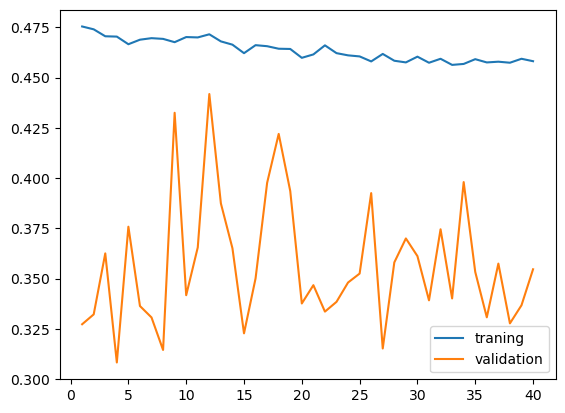

In [46]:
plt.plot(range(1,41),f_hist.history['loss'],label = "traning")
plt.plot(range(1,41),f_hist.history['val_loss'],label = "validation")
plt.legend()

In [47]:
predict = final_model.predict(x_test_transform)

544/544 [==============================] - 1s 2ms/step


In [48]:
predict =np.where(predict>0.5,1,0)

In [49]:
accuracy_score(y_test,predict)

0.8852920883164673

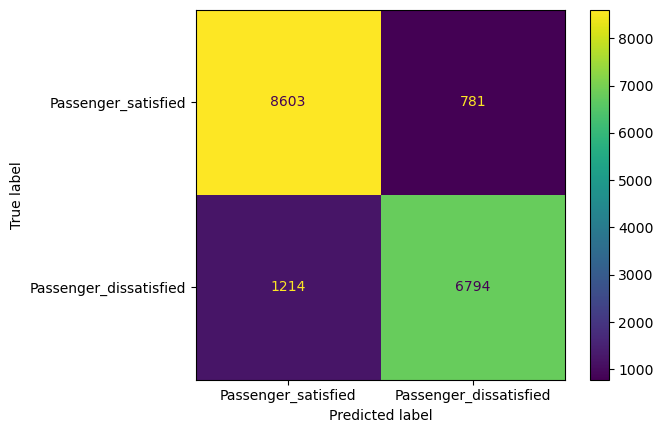

In [50]:
cm = confusion_matrix(y_test,predict)
va=ConfusionMatrixDisplay(cm,display_labels=["Passenger_satisfied","Passenger_dissatisfied"])
va.plot()
plt.show()